# Handwritten Digit Recognition Using MNIST

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model

In [3]:
# Load and split the data into training and test dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [5]:
# Check the data type
print(type(X_train))

<class 'numpy.ndarray'>


In [6]:
# check if interger or float
print(X_train.dtype)

float64


In [8]:
# Reshape data to conv2D (Batch_size, Height, Width, Channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [9]:
# Build a convolutional Neural Network
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    # First convolutional block
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer: 10 classes (0–9)
])

In [10]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

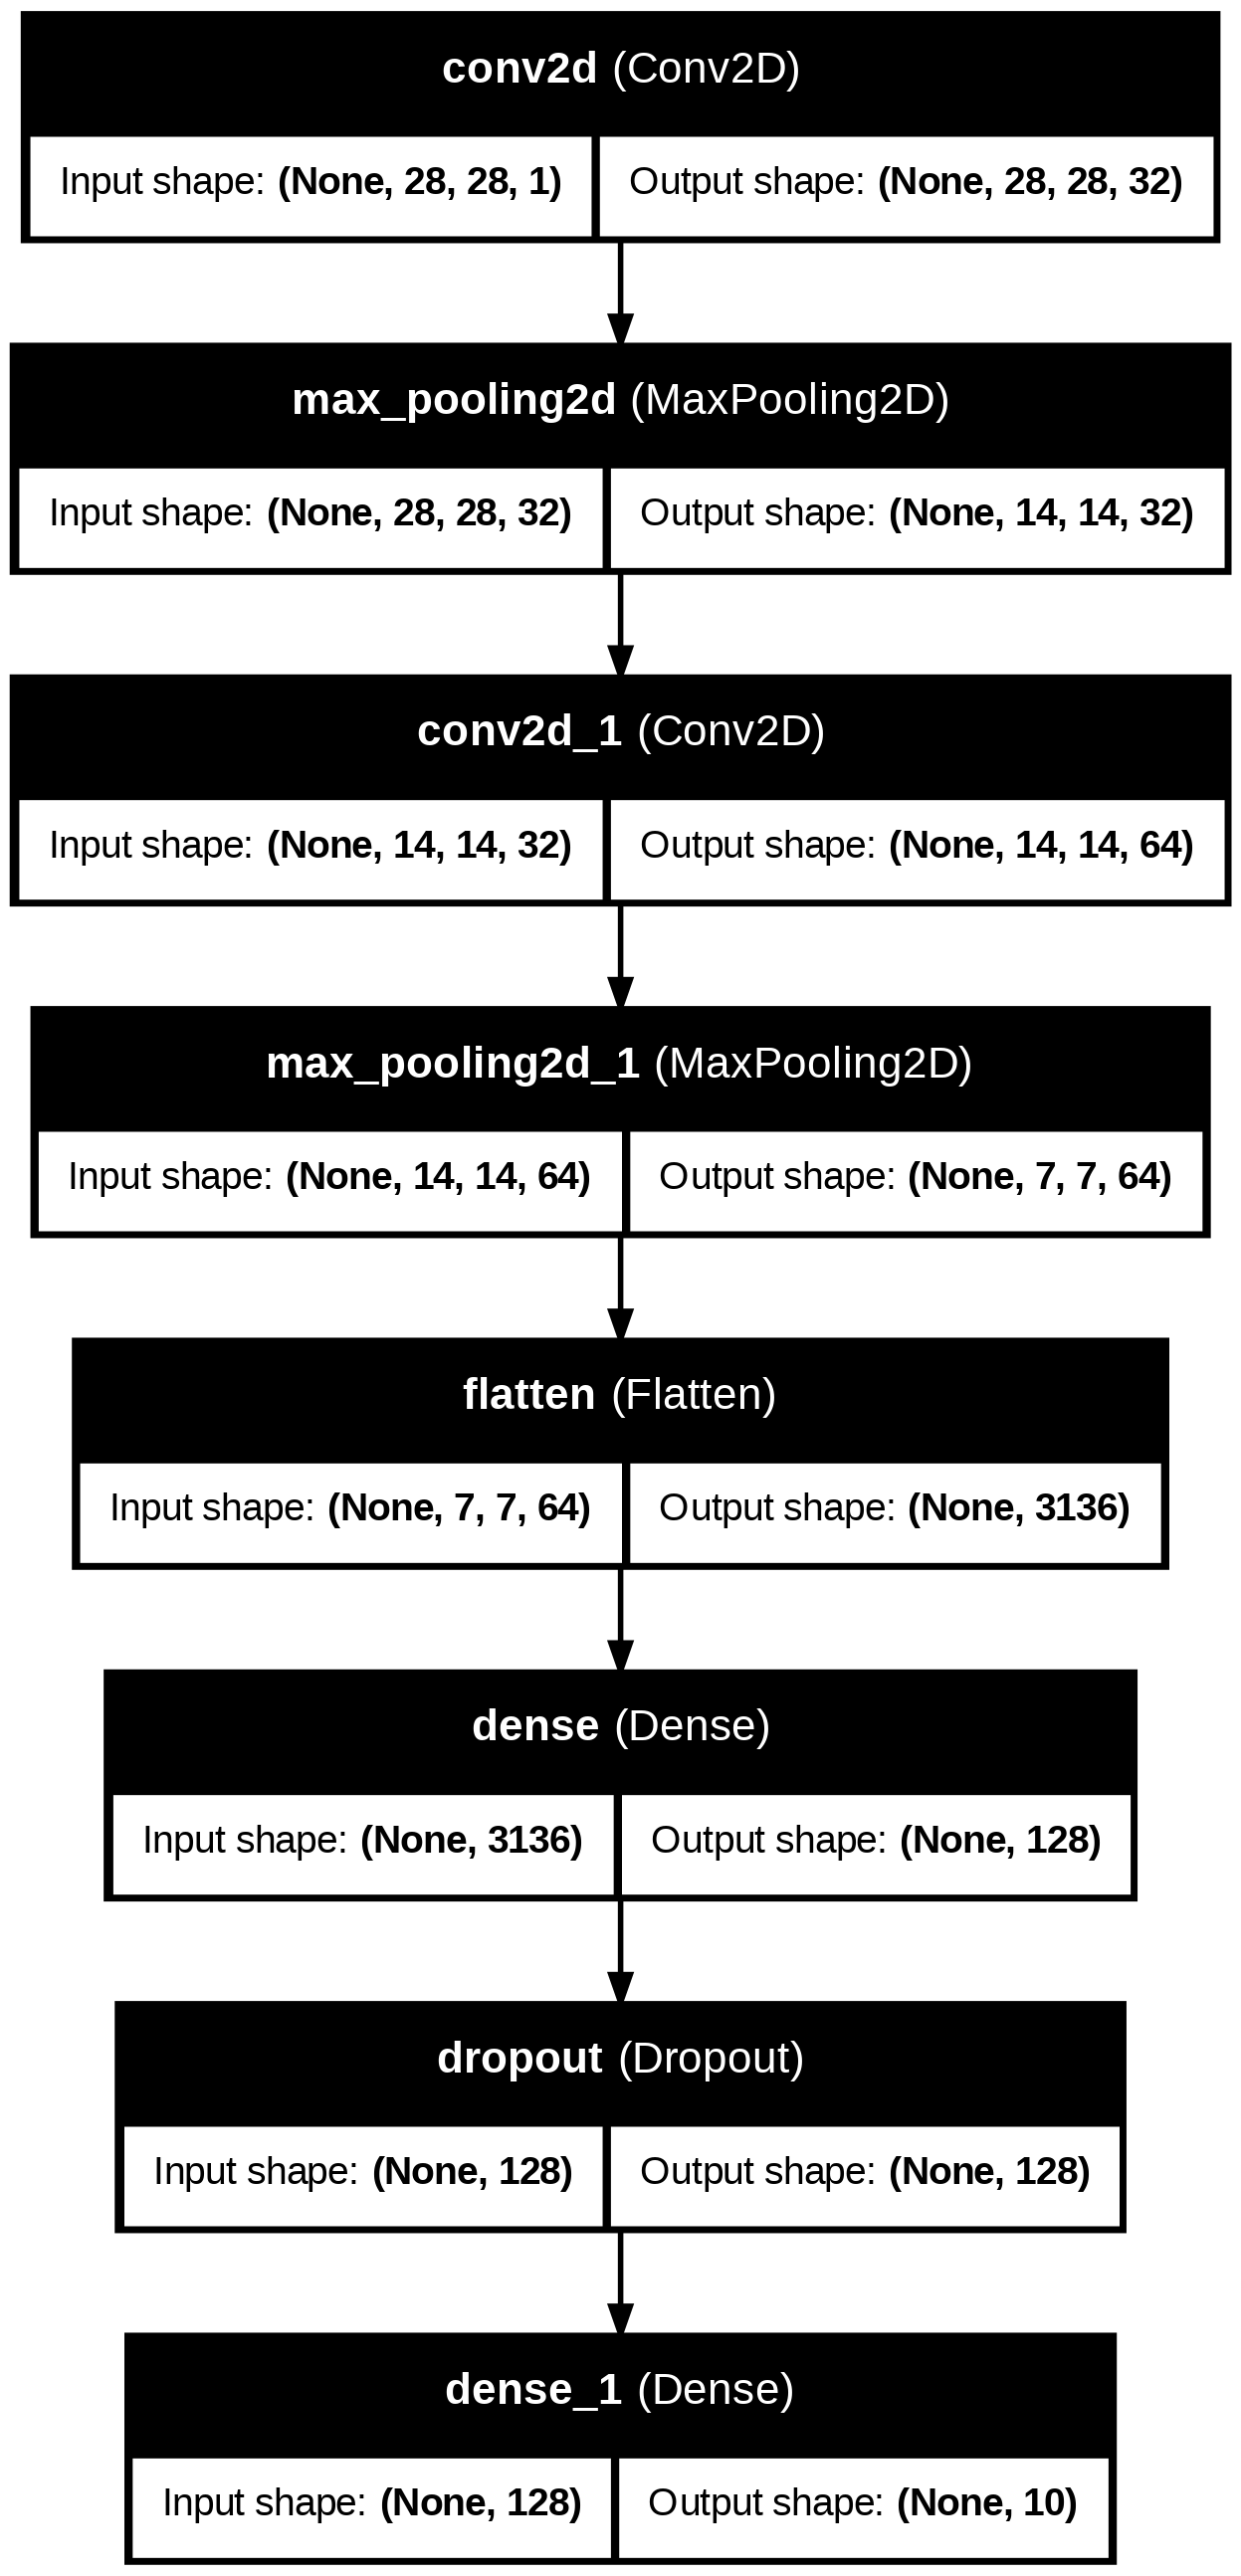

In [16]:
# visualization of the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.8674 - loss: 0.4198 - val_accuracy: 0.9828 - val_loss: 0.0517
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9733 - loss: 0.0890 - val_accuracy: 0.9874 - val_loss: 0.0377
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 137s 42ms/step - accuracy: 0.9816 - loss: 0.0656 - val_accuracy: 0.9902 - val_loss: 0.0331
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9855 - loss: 0.0480 - val_accuracy: 0.9900 - val_loss: 0.0345
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9873 - loss: 0.0410 - val_accuracy: 0.9918 - val_loss: 0.0254
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.9899 - loss: 0.0319 - val_accuracy: 0.9909 - val_loss: 0.0257
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.9909 - loss: 0.0302 - val_accuracy: 0.9916 - val_loss: 0.0263
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.9911 

In [19]:
# Model evaluation
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9896 - loss: 0.0314
Test accuracy: 0.9918000102043152


The model attained an accuracy of 99.18 hence considered a good fit for predictions.

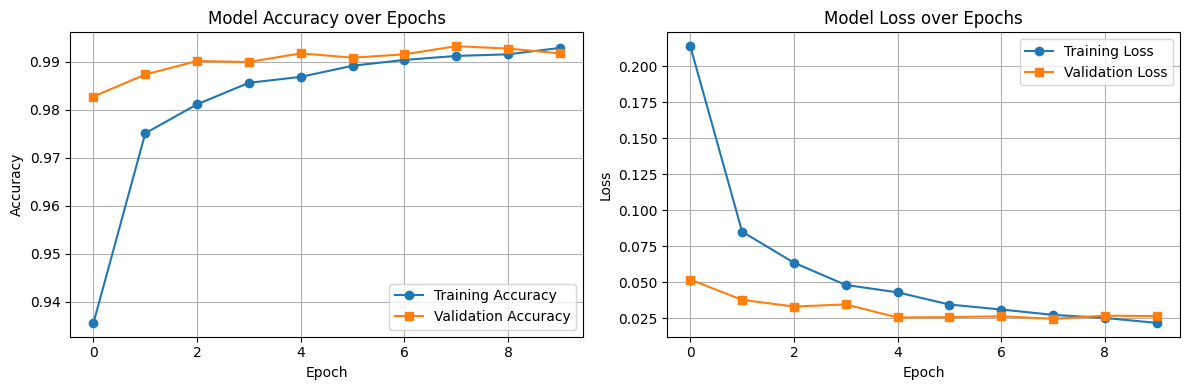

In [29]:
# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
# Test prdictions
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


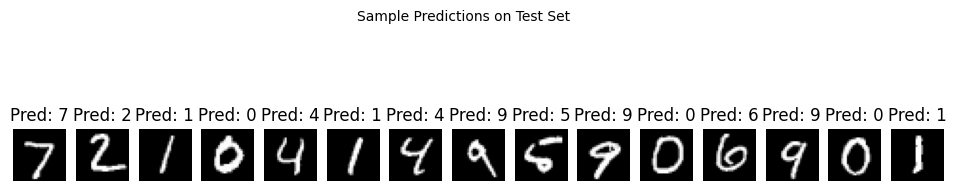

In [36]:
# Predict classes on test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Display some test images with predictions
num_samples = 15
plt.figure(figsize=(12, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.suptitle("Sample Predictions on Test Set", fontsize=10)
plt.show()

The sample prediction had a great perfomance. the model is therefore reliable for predictions.